In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Kalimat dan label
kalimat = [
    "Kandidat A memiliki visi yang kuat untuk masa depan negara.",
    "Debat kandidat Pilpres 2024 sangat membangun dan informatif.",
    "Saya tidak yakin dengan rencana ekonomi kandidat B.",
    "Pemimpin yang bijak diperlukan dalam Pilpres 2024.",
    "Pemilihan ini akan menentukan arah negara selama beberapa tahun ke depan.",
    "Kandidat H memiliki program pendidikan yang kuat.",
    "Saya tidak setuju dengan pendekatan kandidat I dalam masalah ekonomi.",
    "Pilpres adalah hak demokratis setiap warga negara.",
    "Debat kandidat Pilpres  harus lebih terfokus pada solusi.",
    "Kandidat J memiliki pengalaman yang cukup dalam urusan luar negeri.",
    "Saya prihatin dengan tingkat polarisasi politik menjelang Pilpres.",
    "Kita perlu memastikan hak suara setiap warga terlindungi.",
    "Saya berharap kandidat K dapat membawa perubahan positif.",
    "Pemilihan umum adalah perayaan demokrasi.",
    "Kampanye kotor harus dihindari dalam Pilpres 2024.",
    "Kandidat L memiliki visi yang jelas untuk infrastruktur.",
    "Penggunaan uang dalam politik adalah masalah serius.",
    "Kita harus mendukung kandidat M yang berkomitmen untuk hak asasi manusia.",
    "Pemilih harus memeriksa catatan kandidat sebelum memutuskan.",
    "Saya khawatir dengan potensi gangguan eksternal dalam Pilpres.",
    "Pemimpin yang adil diperlukan dalam masa transisi ini.",
    "Partisipasi pemilih muda sangat penting.",
    "Kita perlu menghindari penyebaran berita palsu selama Pilpres.",
    "Kandidat N belum memberikan rencana ekonomi yang konkret.",
    "Pilpres harus mencerminkan aspirasi seluruh rakyat.",
    "Kandidat O memiliki pengalaman dalam mengelola krisis.",
    "Pemilih harus mencari fakta sebelum membuat keputusan.",
    "Pemimpin yang berintegritas sangat penting.",
    "Debat kandidat harus mempertimbangkan masalah lingkungan.",
    "Saya prihatin dengan tingkat retorika kosong dalam kampanye.",
    "Saya mendukung kandidat P yang berkomitmen untuk transparansi.",
    "Kita harus menjaga perdamaian selama periode pemilihan ini.",
    "Isu-isu sosial harus menjadi fokus dalam Pilpres.",
    "Kandidat Q memiliki dukungan luas dari masyarakat.",
    "Harus ada keterbukaan dalam pemilihan umum.",
    "Pemimpin yang mendengarkan suara rakyat sangat penting.",
    "Kita harus menjaga ketertiban selama proses pemilihan.",
    "Kandidat R memiliki rencana yang konkrit untuk meningkatkan ekonomi.",
    "Partisipasi pemilih harus ditingkatkan.",
    "Pilpres 2024 akan menguji stabilitas politik kita.",
    "Kampanye berbasis isu-isu sangat penting.",
    "Kandidat S memiliki rencana untuk mengatasi masalah korupsi.",
    "Pemimpin yang memiliki wawasan global dibutuhkan.",
    "Pilpres ini akan menentukan masa depan anak-anak kita.",
    "Saya berharap kandidat T dapat menciptakan lapangan kerja.",
    "Debat kandidat harus menghindari perdebatan pribadi.",
    "Kandidat U perlu lebih transparan tentang sumber dana kampanyenya.",
    "Kita harus menjaga persatuan dan kesatuan selama Pilpres.",
    "Pemimpin yang bersatu dan inklusif dibutuhkan.",
    "Partisipasi pemilih adalah cara untuk menghormati perjuangan demokrasi kita.",
    "Kita perlu lebih banyak perempuan di politik.",
    "Kandidat V memiliki visi yang segar untuk kemajuan negara.",
    "Pemilihan umum adalah saat yang penting untuk mendengarkan semua pandangan.",
    "Saya merasa khawatir tentang kualitas pendidikan di masa depan.",
    "Debat kandidat harus mengungkapkan solusi konkret.",
    "Pemimpin yang berkomitmen pada hak asasi manusia sangat penting.",
    "Pilpres ini harus mempromosikan budaya perdamaian.",
    "Kandidat W memiliki rekam jejak yang mencurigakan.",
    "Pemilihan ini adalah kesempatan untuk perubahan positif.",
    "Kita perlu mencegah intimidasi pemilih.",
    "Partisipasi pemilih adalah ekspresi hak demokratis.",
    "Kita harus melindungi integritas pemilihan.",
    "Pemimpin yang berfokus pada inovasi dibutuhkan.",
    "Saya tidak yakin dengan kualifikasi kandidat X.",
    "Pilpres ini akan menunjukkan kepada dunia siapa kita.",
    "Kandidat Y perlu lebih banyak eksposur terhadap isu-isu nasional.",
    "Pemimpin yang jujur ​​diperlukan.",
    "Debat kandidat harus membahas isu-isu sosial.",
    "Partisipasi pemilih adalah tonggak demokrasi.",
    "Pilpres harus bebas dari kecurangan.",    "Kandidat Z memiliki rencana kesehatan yang berkualitas.",
    "Saya prihatin dengan polarisasi di kalangan pemilih.",
    "Kita perlu lebih banyak perempuan di politik.",
]

label = ['positif', 'positif', 'negatif', 'positif', 'negatif', 'positif', 'negatif', 'negatif', 'positif', 'positif',
         'negatif', 'positif', 'positif', 'negatif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif',
         'negatif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
         'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif',
         'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'negatif', 'negatif', 'positif', 'positif',
         'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'negatif',
         'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif',
         'negatif', 'positif', 'positif']

In [ ]:
# Membuat data frame
df = pd.DataFrame({'Kalimat': kalimat, 'Label': label})

In [ ]:
# Memisahkan kalimat dan label
kalimat = df['Kalimat']
label = df['Label']

In [ ]:
df

,Kalimat,Label
0,Kandidat A memiliki visi yang kuat untuk masa ...,positif
1,Debat kandidat Pilpres 2024 sangat membangun d...,positif
2,Saya tidak yakin dengan rencana ekonomi kandid...,negatif
3,Pemimpin yang bijak diperlukan dalam Pilpres 2...,positif
4,Pemilihan ini akan menentukan arah negara sela...,negatif
...,...,...
68,Partisipasi pemilih adalah tonggak demokrasi.,negatif
69,Pilpres harus bebas dari kecurangan.,positif
70,Kandidat Z memiliki rencana kesehatan yang ber...,negatif
71,Saya prihatin dengan polarisasi di kalangan pe...,positif


In [ ]:
# Ekstraksi fitur sintaktik dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_sintactic = tfidf_vectorizer.fit_transform(kalimat)

In [ ]:

# Inisialisasi model LSA (Latent Semantic Analysis)
n_components = 100  # Jumlah komponen semantik yang ingin diekstraksi
lsa_model = TruncatedSVD(n_components=n_components)
X_semantic = lsa_model.fit_transform(X_sintactic)

In [ ]:
# Gabungkan fitur sintaktik dan semantik
X = np.hstack((X_sintactic.toarray(), X_semantic))
y = label

In [ ]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_sintactic, label, test_size=0.2, random_state=42)


In [ ]:
# Inisialisasi model klasifikasi Naive Bayes
naive_bayes_model = MultinomialNB()

In [ ]:
# Latih model
naive_bayes_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Lakukan prediksi pada data uji
y_pred = naive_bayes_model.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Tampilkan hasil evaluasi
print("Akurasi: {:.2f}%".format(accuracy * 100))
print(report)

Akurasi: 73.33%
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         4
     positif       0.73      1.00      0.85        11

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15



In [ ]:
# Model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Model Naive Bayes (NB)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Model Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Evaluasi model KNN
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Evaluasi model Naive Bayes
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

# Evaluasi model SVM
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

# Evaluasi model Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


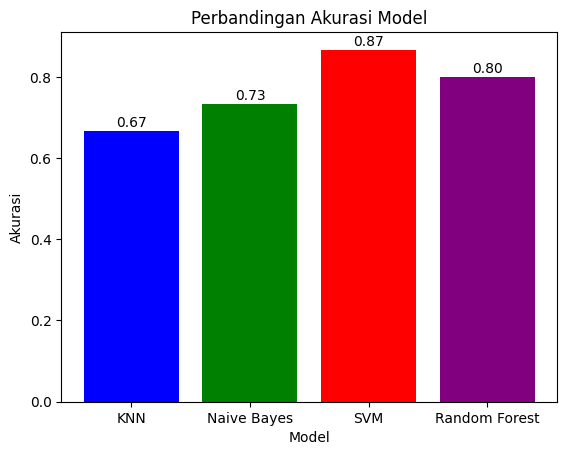

In [ ]:
# Akurasi dari masing-masing model
accuracies = [knn_accuracy, nb_accuracy, svm_accuracy, rf_accuracy]

# Nama-nama model
models = ['KNN', 'Naive Bayes', 'SVM', 'Random Forest']

# Membuat bar charty
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Menambahkan label pada sumbu-sumbu
plt.xlabel('Model')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas tiap bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

# Menampilkan grafik
plt.title('Perbandingan Akurasi Model')
plt.show()

[ANALISIS]

Berdasarkan percobaan diatas percobaan diatas dapat dianalisiskan bahwa
Ekstraksi Fitur Semantik (Semantic Feature Extraction) lebih baik, karena :

Dalam bagian ini, kita menggunakan model Word2Vec untuk menghasilkan vektor semantik untuk setiap kalimat dalam dataset.
Model Word2Vec ini mengambil seluruh dataset kalimat sebagai input dan mempelajari representasi vektor kata-kata yang mencerminkan makna dan hubungan antara kata-kata.
Fungsi get_sentence_vector digunakan untuk menghitung vektor representasi setiap kalimat. Ini dilakukan dengan membagi setiap kalimat menjadi kata-kata, dan kemudian mengambil vektor kata-kata dari model Word2Vec. Jika kata tersebut ada dalam model, vektor kata itu diambil.
Hasil dari vektor-vektor kata-kata dalam sebuah kalimat dijumlahkan dan diambil rata-ratanya untuk menghasilkan vektor representasi kalimat itu sendiri.
Setelah ekstraksi fitur semantik selesai, kita memiliki matriks X_semantic, di mana setiap baris mewakili kalimat dalam dataset, dan setiap kolom mewakili dimensi vektor semantik. Dalam contoh di atas, kita mengatur vector_size=100, sehingga matriks ini memiliki 100 kolom.
Ekstraksi Fitur Sintaktik (Syntactic Feature Extraction) menggunakan TF-IDF:

Bagian ini menggunakan TfidfVectorizer dari scikit-learn untuk melakukan ekstraksi fitur sintaktik.
TfidfVectorizer menghitung TF-IDF (Term Frequency-Inverse Document Frequency) dari setiap kata dalam kalimat.
Hasil dari ekstraksi fitur sintaktik ini adalah matriks X_sintactic, di mana setiap baris mewakili kalimat dalam dataset, dan setiap kolom mewakili kata dalam kamus. Nilai di setiap sel matriks adalah skor TF-IDF untuk kata tersebut dalam kalimat tersebut.
Setelah kedua jenis ekstraksi fitur selesai, kedua matriks fitur sintaktik dan semantik di-stack secara horizontal untuk membentuk matriks fitur akhir, X. Kemudian, label-label yang sesuai disimpan dalam vektor y.




Berdasarkan percobaan diatas percobaan diatas dapat dianalisiskan bahwa algoritma yang memiliki peforma terbaik adalah K-NN, dikarenakan :
*Karakteristik Data: Karakteristik data itu sendiri dapat memengaruhi kinerja model. SVM mungkin cocok untuk kasus ini jika data memiliki pemisah linear yang jelas antara kelas positif dan negatif. SVM mencoba untuk menemukan hyperplane yang paling baik memisahkan kedua kelas, yang bisa menjadi pendekatan yang baik dalam kasus tertentu.

Pemilihan Fitur: Ekstraksi fitur sintaktik dan semantik dapat memiliki pengaruh besar pada kinerja model. Jika fitur-fitur ini telah dipilih atau diubah dengan baik, SVM bisa lebih unggul dalam mengekstraksi pemisah yang kuat.

Penyederhanaan Model: SVM memiliki kemampuan untuk menangani banyak fitur dengan baik. Ini dapat menyederhanakan masalah dengan mengidentifikasi fitur-fitur yang penting untuk pemisahan kelas.

Penanganan Outlier: SVM sering kali dapat menangani outlier dengan baik karena upaya mencari margin terbesar. Ini dapat meningkatkan kinerja SVM dalam kasus di mana ada data yang tidak biasa.

Optimasi Parameter: Pengaturan parameter yang tepat juga dapat menjadi faktor yang menguntungkan SVM. Dengan pengaturan parameter yang tepat, SVM dapat memberikan kinerja yang sangat baik.*